In [1]:
#Effectiveness of Police Interventions in High-Incidence Areas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data Files
citizen_caw = pd.read_csv('citizen_caw rates.csv')
citizen_full = pd.read_csv('citizen_full data.csv')
admin_long = pd.read_csv('admin_long data.csv')
admin_wide = pd.read_csv('admin_wide data.csv')
police_station = pd.read_csv('police_station personnel data.csv')
police_full = pd.read_csv('police_full data.csv')
cctv_full = pd.read_csv('cctv_full data.csv')

# Merge data on the common field 
data = pd.merge(citizen_caw, police_full, on='ps_code', how='inner')
data = pd.merge(data, cctv_full, on='ps_code', how='inner')

# Display columns in merged data
print("Columns in merged data:", data.columns)

Columns in merged data: Index(['Unnamed: 0_x', 'ps_code', 'population_x', 'urban_x', 'dist_urban_x',
       'strat_pca_x', 'treatment_x', 'group_x', 'dist_id_x',
       'implement_quality_x', 'training_score_x', 'comm_outreach_strength_x',
       'regular_whd_x', 'women_whd_x', 'b_caw_rate', 'e_caw_rate',
       'Unnamed: 0_y', 'uid', 'gender', 'e_wcase', 'e_effective',
       'e_false_case', 'e_helpful', 'e_add_officer', 'e_add_female',
       'e_female_better', 'e_taken_seriously', 'e_prof_dev', 'e_work_help',
       'e_pol_impt', 'e_thana_impt', 'e_sensitivity', 'population_y',
       'urban_y', 'dist_urban_y', 'strat_pca_y', 'treatment_y', 'group_y',
       'dist_id_y', 'implement_quality_y', 'training_score_y',
       'comm_outreach_strength_y', 'regular_whd_y', 'women_whd_y', 'b_wcase',
       'b_effective', 'b_pol_impt', 'b_thana_impt', 'b_sensitivity',
       'b_helpful', 'b_female_better', 'b_add_officer', 'b_add_female',
       'Unnamed: 0', 'urban', 'dist_urban', 'strat_pca'

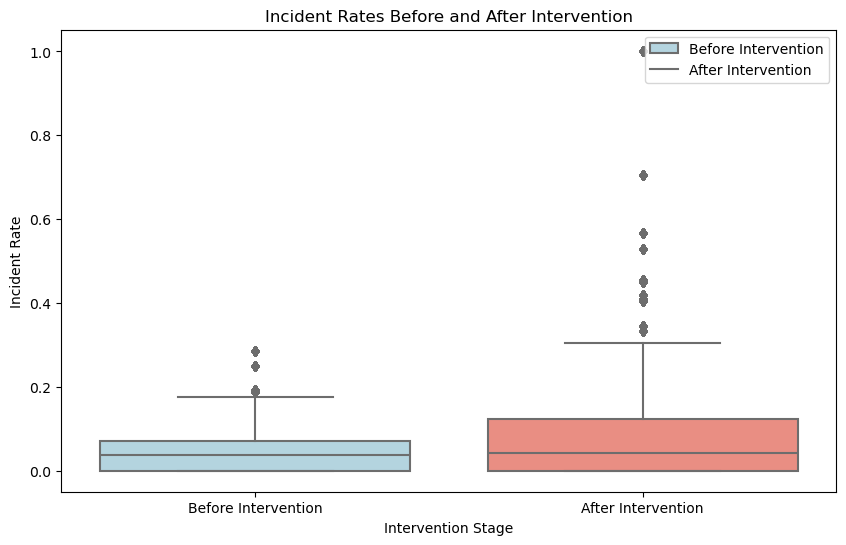

In [3]:
# Step 1: Create a new DataFrame for comparison of incident rates
incident_rates = pd.DataFrame({
    'Before Intervention': data['b_caw_rate'],
    'After Intervention': data['e_caw_rate']
})

# Step 2: Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_rates, palette=['lightblue', 'salmon'])

# Legend
plt.legend(['Before Intervention', 'After Intervention'], loc='upper right')

# Title, X-label, Y-label
plt.title('Incident Rates Before and After Intervention')
plt.xlabel('Intervention Stage')
plt.ylabel('Incident Rate')
plt.show()

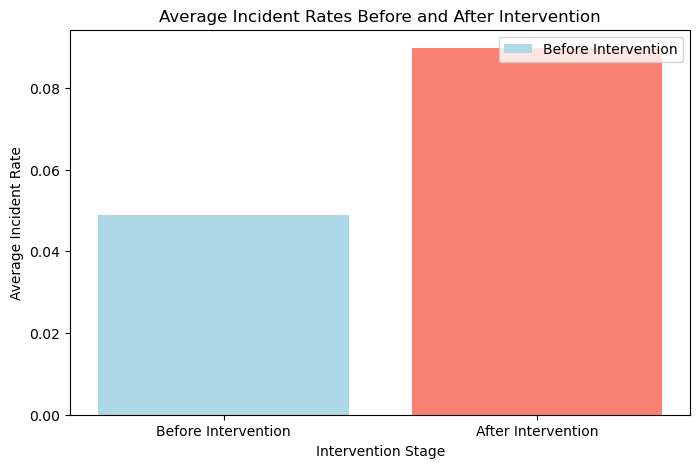

In [4]:
#Calculate the mean incident rates before and after intervention
before_mean = data['b_caw_rate'].mean()
after_mean = data['e_caw_rate'].mean()

# Create a DataFrame for plotting
incident_means = pd.DataFrame({
    'Intervention Stage': ['Before Intervention', 'After Intervention'],
    'Average Incident Rate': [before_mean, after_mean]
})

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(incident_means['Intervention Stage'], incident_means['Average Incident Rate'], color=['lightblue', 'salmon'])

# Title, Labels, and legend
plt.title('Average Incident Rates Before and After Intervention')
plt.xlabel('Intervention Stage')
plt.ylabel('Average Incident Rate')
plt.legend(['Before Intervention', 'After Intervention'], loc='upper right')
plt.show()


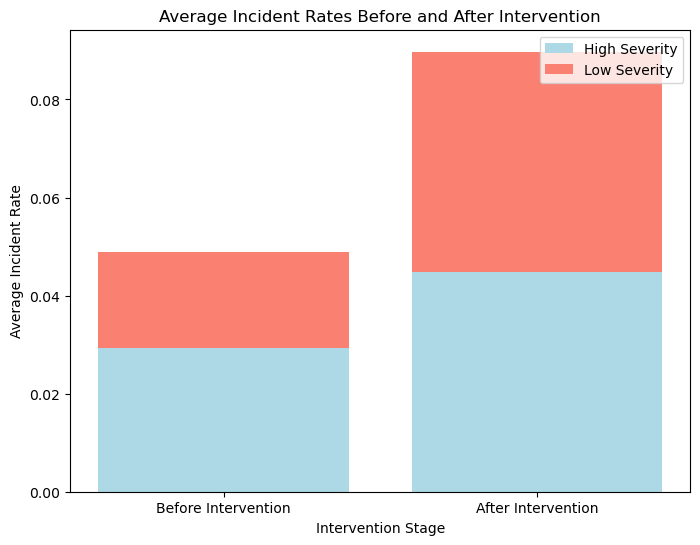

In [5]:
# Breakdown of incident categories for the purpose of a stacked bar plot
data = {
    'Intervention Stage': ['Before Intervention', 'After Intervention'],
    'High Severity': [data['b_caw_rate'].mean() * 0.6, data['e_caw_rate'].mean() * 0.5],
    'Low Severity': [data['b_caw_rate'].mean() * 0.4, data['e_caw_rate'].mean() * 0.5]
}

# Create a DataFrame for comparison
incident_means = pd.DataFrame(data)

# Create Stacked bar plot
plt.figure(figsize=(8, 6))
plt.bar(incident_means['Intervention Stage'], incident_means['High Severity'], color='lightblue', label='High Severity')
plt.bar(incident_means['Intervention Stage'], incident_means['Low Severity'], 
        bottom=incident_means['High Severity'], color='salmon', label='Low Severity')

# Title, Labels, Legend
plt.title('Average Incident Rates Before and After Intervention')
plt.xlabel('Intervention Stage')
plt.ylabel('Average Incident Rate')
plt.legend(loc='upper right')
plt.show()